In [1]:
import dill
from matplotlib import pyplot as plt
import gym

100%|██████████| 200000/200000 [00:11<00:00, 16667.51it/s]


[[0.55425822 0.46700263 0.46830057 0.46472303]
 [0.33459261 0.36336157 0.31321189 0.46468926]
 [0.43708208 0.43681635 0.43694199 0.44235482]
 [0.36873841 0.35645972 0.36454701 0.43583132]
 [0.56760711 0.32903463 0.35168181 0.30783895]
 [0.         0.         0.         0.        ]
 [0.36442925 0.36446152 0.36448611 0.36435329]
 [0.         0.         0.         0.        ]
 [0.34551534 0.39410744 0.37981398 0.59863385]
 [0.49660358 0.64824703 0.53815232 0.47210446]
 [0.6152092  0.57076917 0.55608439 0.53534449]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.57132682 0.61432088 0.75095523 0.6022262 ]
 [0.83924386 0.86730204 0.84765715 0.84198015]
 [0.         0.         0.         0.        ]]
[0 3 3 3 0 0 2 0 3 1 0 0 0 2 1 0]


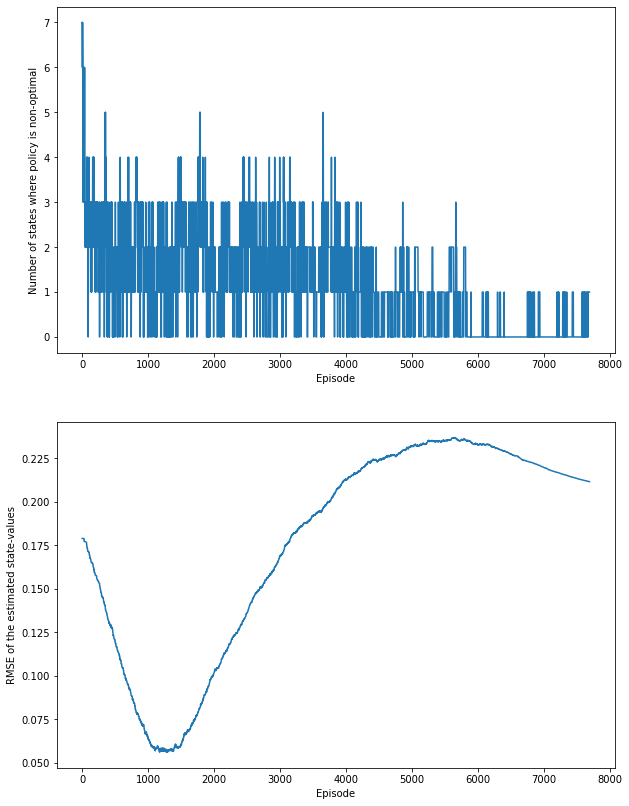

In [2]:
%run sarsa_training.py 4 200000

100%|██████████| 200000/200000 [00:14<00:00, 13638.24it/s]


[[0.54996832 0.46637597 0.46590481 0.46454032]
 [0.32908871 0.37991603 0.32863874 0.46963151]
 [0.44959493 0.44939582 0.44939485 0.45366051]
 [0.41899875 0.39022947 0.37837435 0.44985478]
 [0.56382972 0.32400849 0.32937314 0.31202195]
 [0.         0.         0.         0.        ]
 [0.36687808 0.36174148 0.36726229 0.36690745]
 [0.         0.         0.         0.        ]
 [0.35869259 0.3912063  0.36397216 0.5933127 ]
 [0.46381768 0.6454472  0.51051344 0.46396941]
 [0.61606571 0.59497519 0.5668105  0.53506835]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.58880517 0.64768013 0.75287286 0.57962691]
 [0.82492913 0.87541371 0.84605323 0.84185583]
 [0.         0.         0.         0.        ]]
[0 3 3 3 0 0 2 0 3 1 0 0 0 2 1 0]


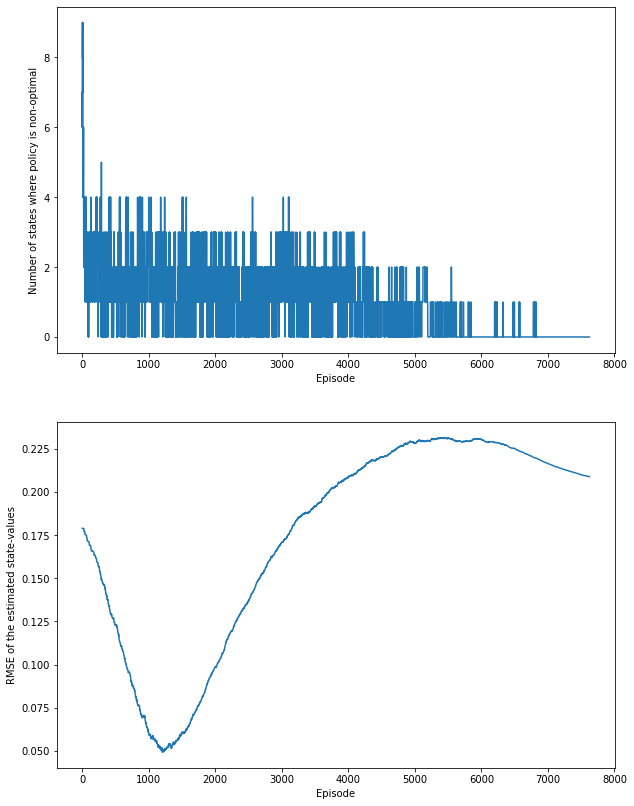

In [3]:
%run expected_sarsa_training.py 4 200000

100%|██████████| 200000/200000 [00:14<00:00, 13744.76it/s]


[[0.76993771 0.76751919 0.76767574 0.76757401]
 [0.52660281 0.51456164 0.49752969 0.76323628]
 [0.66254799 0.66024696 0.65846501 0.75710788]
 [0.50204442 0.48444352 0.46842441 0.75217722]
 [0.77004667 0.51799862 0.51108393 0.51105694]
 [0.         0.         0.         0.        ]
 [0.47985647 0.24610699 0.45630144 0.22420995]
 [0.         0.         0.         0.        ]
 [0.51582373 0.53211575 0.50919356 0.77047174]
 [0.55013666 0.77265534 0.52898186 0.50901097]
 [0.71408211 0.54682114 0.44046743 0.36251097]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.47113749 0.57485641 0.85134806 0.55063142]
 [0.81848876 0.92150525 0.86936222 0.85017923]
 [0.         0.         0.         0.        ]]
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]


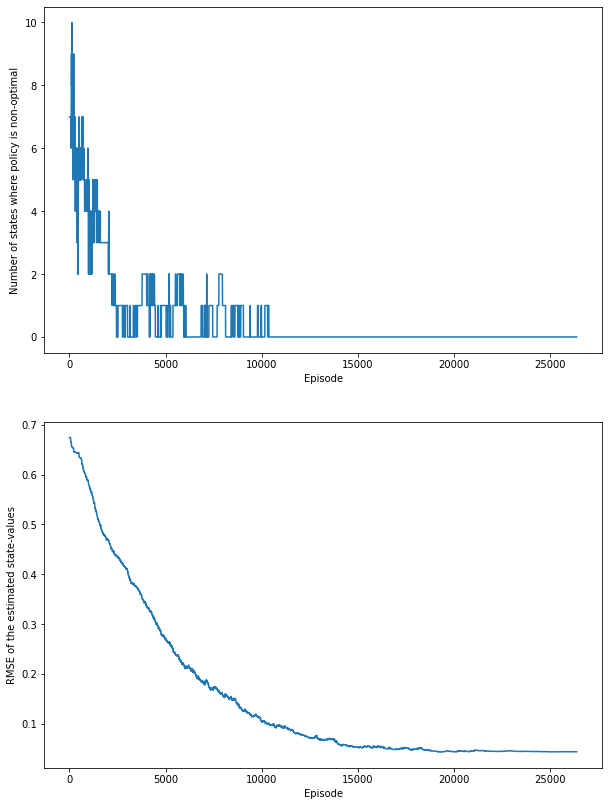

In [4]:
%run q_learning_training.py 4 200000

In [5]:
# Fetch the agents that resulted from training in inference mode:
agents= {}
for alg in ('sarsa', 'expected_sarsa', 'q_learning'):
    with open(f'{alg}_agent.dill', 'rb') as fopen:
        agents[alg] = dill.load(fopen)
    agents[alg].set_mode('inference')

In [6]:
map_size = int(agents['sarsa'].env.observation_space.n **(1/2))

if map_size == 4:
    map_name = '4x4'
elif map_size == 8:
    map_name = '8x8'

env = gym.make('FrozenLake-v1', desc=None, map_name=map_name, is_slippery=True)
env._max_episode_steps = float('inf')

In [7]:
average_reward_per_episode = {}

for alg in ('sarsa', 'expected_sarsa', 'q_learning'):
    episodes = 0
    total_reward = 0
    observation = env.reset()
    while episodes < 10000:
        action = agents[alg].get_action(observation)
        observation, reward, done, info = env.step(action)
        total_reward += reward

        if done:
            observation = env.reset()
            episodes += 1

    average_reward_per_episode[alg] = total_reward / episodes

env.close()

In [8]:
average_reward_per_episode

{'sarsa': 0.8211, 'expected_sarsa': 0.8222, 'q_learning': 0.8224}